# Linear Regression Assignment
Submitted by : Sushant Parihar

# Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

# Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#We need to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

# Step 1 : Data Reading and Understanding

In [3]:
# Importing the Dataset
carprice = pd.read_csv(r"CarPrice_Assignment.csv")

In [4]:
#Checking the Dataset
carprice.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

### Data Inspection

In [5]:
carprice.shape

(205, 26)

In [6]:
carprice.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [7]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

As we can clearly see here there is no null values in the dataset, so we are good to go for the Analysis part. There is no need for Data cleansing.

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building.

In [8]:
Cname=carprice['CarName'].apply(lambda x:x.split(" "))
carprice['CompanyName']=Cname.apply(lambda x:list(x)[0])

In [9]:
carprice=carprice.drop('CarName', axis=1)

In [10]:
# Correcting rows with incorrect Company Name
carprice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
carprice.loc[carprice['CompanyName'].isin(['vokswagen','vw']),['CompanyName']]='volkswagen'
carprice.loc[carprice['CompanyName'].isin(['toyouta']),['CompanyName']]='toyota'
carprice.loc[carprice['CompanyName'].isin(['porcshce']),['CompanyName']]='porsche'
carprice.loc[carprice['CompanyName'].isin(['maxda']),['CompanyName']]='mazda'
carprice.loc[carprice['CompanyName'].isin(['Nissan']),['CompanyName']]='nissan'

In [12]:
carprice.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength     ...       fuelsystem  boreratio  \
0          front       88.6      168.8     ...             mpfi       3.47   
1          front       88.6      168.8     ...             mpfi       3.47   
2          front       94.5      171.2     ...             mpfi       2.68   
3          front       99.8      176.6     ...             mpfi       3.19   
4          front       99.4      176.6     ...             mpfi       3.19   

   stroke compressionratio horsepower  peakrpm citympg  highwaympg    price  \
0    2.68              9.0        111     5000      21          27  13495.0   
1    2.68              9.0        111     5000      21          27  16500.0   
2    3.47              9.0        154     5000      19          26  16500.0   
3    3.40             10.0        102     5500      24          30  13950.0   
4    3.40              8.0        115     5500      18          22  17450.0   

   CompanyName  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi  

[5 rows x 26 columns]

In [13]:
carprice.shape


(205, 26)

### Data Visualisation and EDA

#### Using PAIRPLOT to Visualize numeric variables

In [14]:
plot=sns.pairplot(carprice,height=10,aspect =0.5)
plot.fig.set_size_inches(16,16)
plt.show()

As we can clearly see from the above Pairplot that our dependent variable PRICE follows some linear pattern for carlength, carwidth, curbweight, enginesize variables.

### Visualization based on categorical variables

In [15]:
def dataplot(var):
    sns.barplot(x=var,y='price',data=carprice)

In [16]:
plt.figure(figsize=(25,15))
dataplot('CompanyName')

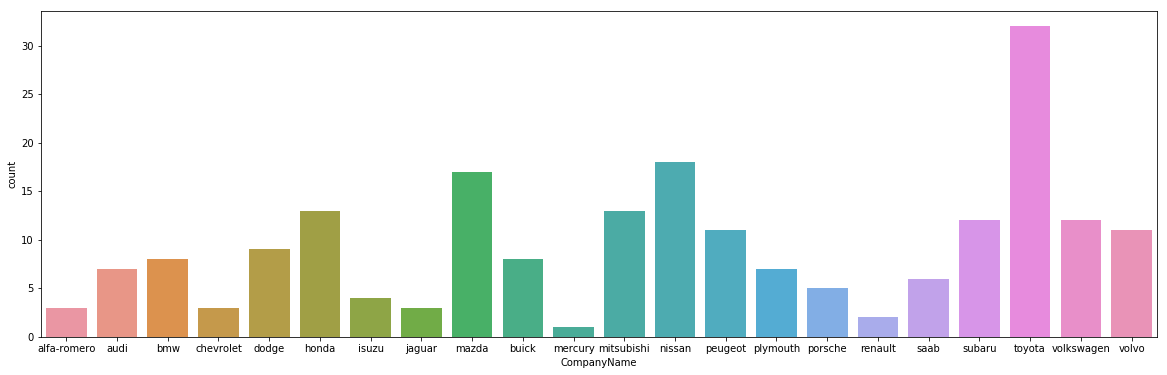

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(x='CompanyName',data=carprice)

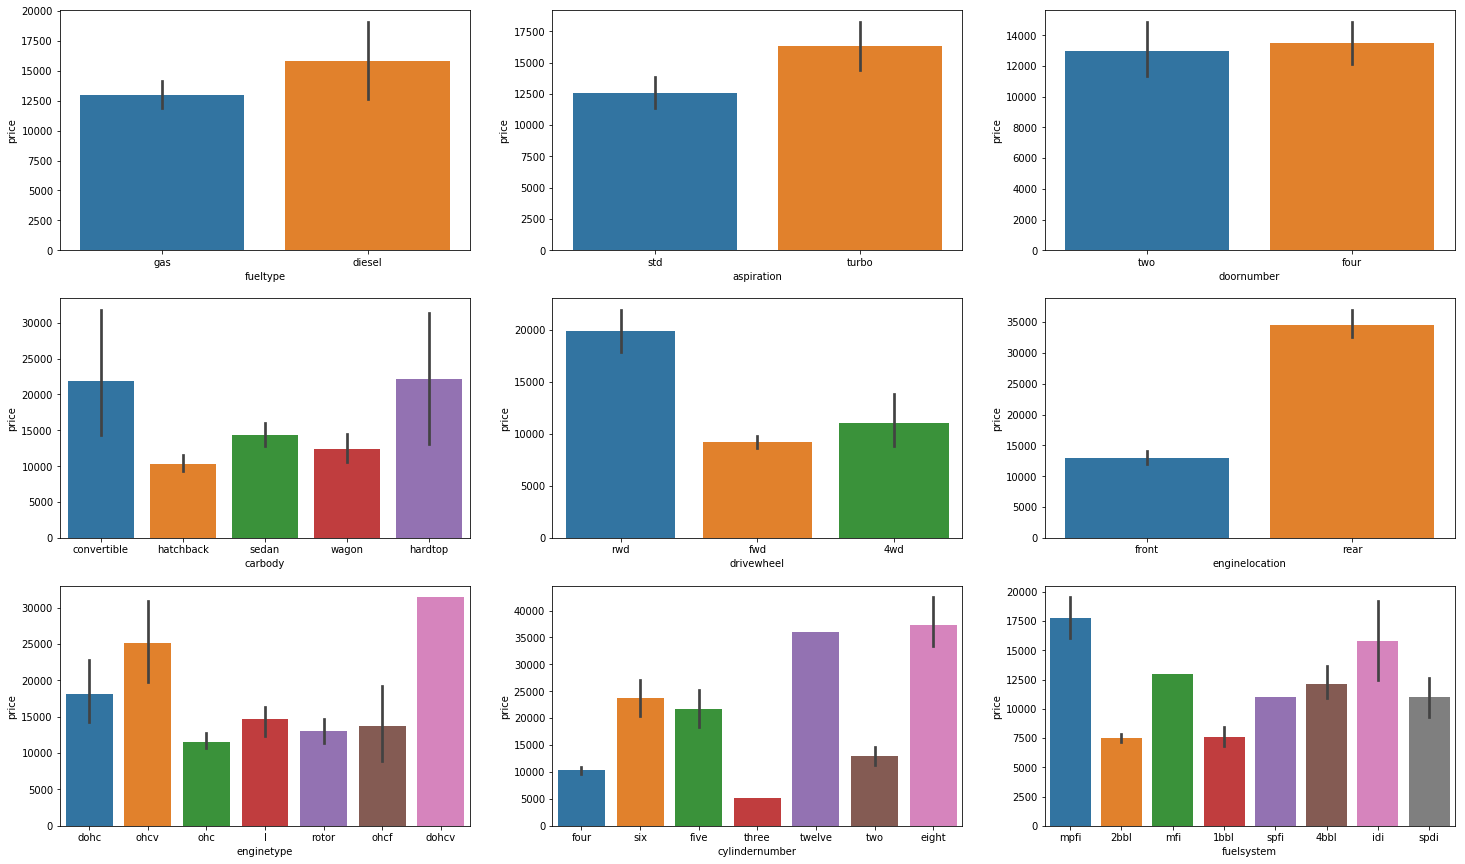

In [18]:
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
dataplot('fueltype')
plt.subplot(3,3,2)
dataplot('aspiration')
plt.subplot(3,3,3)
dataplot('doornumber')
plt.subplot(3,3,4)
dataplot('carbody')
plt.subplot(3,3,5)
dataplot('drivewheel')
plt.subplot(3,3,6)
dataplot('enginelocation')
plt.subplot(3,3,7)
dataplot('enginetype')
plt.subplot(3,3,8)
dataplot('cylindernumber')
plt.subplot(3,3,9)
dataplot('fuelsystem')
plt.show()

In [19]:
def data_boxplot(xvar):
    sns.boxplot(x=xvar, y='price', data=carprice)

In [20]:
plt.figure(figsize=(8,4))
data_boxplot('fueltype')
plt.show()

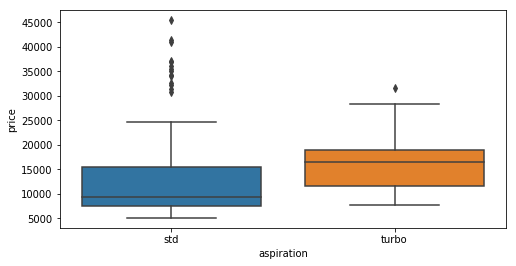

In [21]:
plt.figure(figsize=(8,4))
data_boxplot('aspiration')
plt.show()

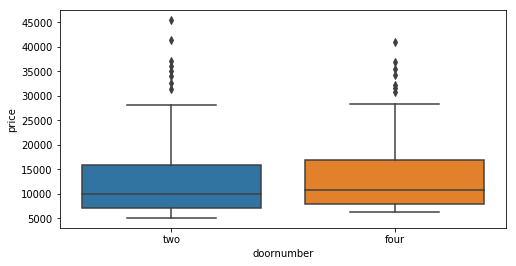

In [22]:
plt.figure(figsize=(8,4))
data_boxplot('doornumber')
plt.show()

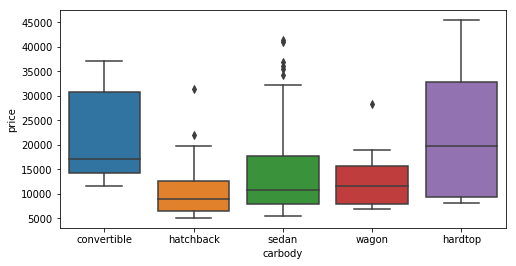

In [23]:
plt.figure(figsize=(8,4))
data_boxplot('carbody')
plt.show()

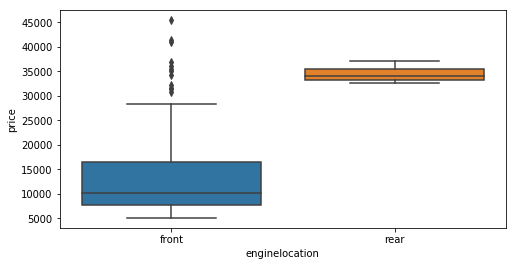

In [24]:
plt.figure(figsize=(8,4))
data_boxplot('enginelocation')
plt.show()

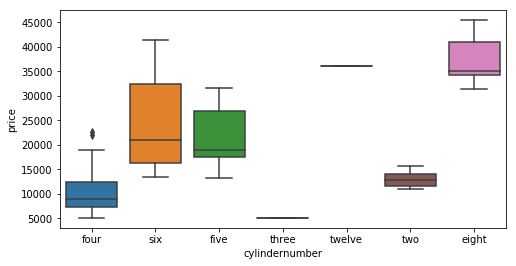

In [25]:
plt.figure(figsize=(8,4))
data_boxplot('cylindernumber')
plt.show()

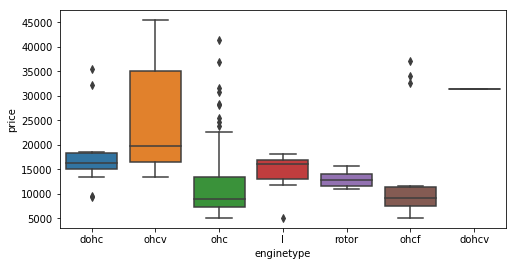

In [26]:
plt.figure(figsize=(8,4))
data_boxplot('enginetype')
plt.show()

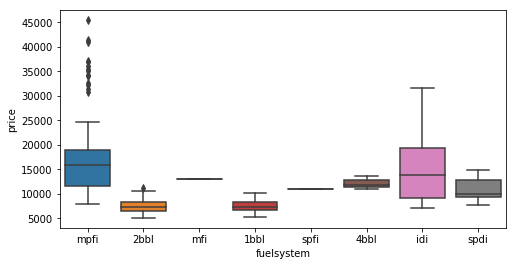

In [27]:
plt.figure(figsize=(8,4))
data_boxplot('fuelsystem')
plt.show()

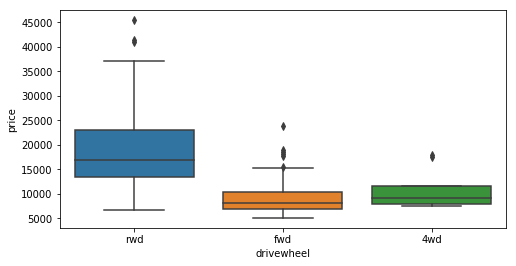

In [28]:
plt.figure(figsize=(8,4))
data_boxplot('drivewheel')
plt.show()

In [29]:
carprice.corr()

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg           0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg        0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price            -0.109093  -0.079978   0.577816   0.682920  0.759325   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling         -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase          0.589435    0.776386    0.569329   0.488750  0.160959   
carlength          0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth           0.279210    0.867032    0.735433   0.559150  0.182942   
carheight          1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight         0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize         0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio          0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke            -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio   0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower        -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm           -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg           -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price              0.119336    0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
car_ID              0.011255 -0.109093  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbwei

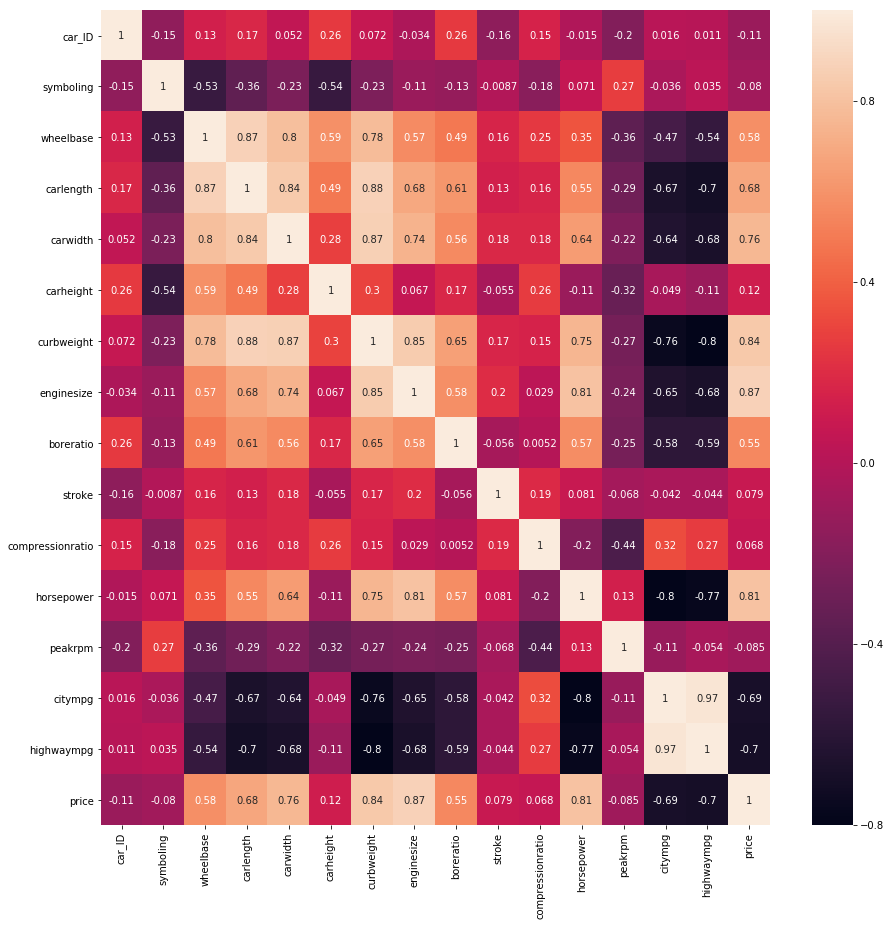

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(carprice.corr(),annot=True)

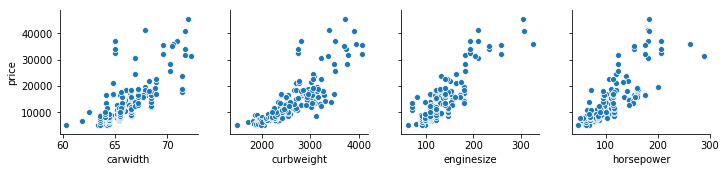

In [31]:
sns.pairplot(data= carprice,x_vars=['carwidth','curbweight','enginesize','horsepower'],y_vars='price')

### Data Preparation
In the data set, we can find some variable which have two values. We can convert these values into dummy values like 0/1 and quantify the categorical variables

In [32]:
carprice_dummies= pd.get_dummies(carprice,drop_first=True)

In [33]:
carprice_dummies.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_hon

In [34]:
#car_id does not hold nay relevance to the model, thus dropping it
carprice_dummies=carprice_dummies.drop(['car_ID'],axis=1)

### Building the Linear Regression Model

##### Spliting the Data into Train and Test Set

In [35]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test =train_test_split(carprice_dummies,train_size=0.7,test_size=0.3, random_state=100)

#### Rescaling through MINMAX Scalar

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [37]:
# Applying Scalar to all the numerical values
numeric_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','symboling',
         'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[numeric_vars]=scaler.fit_transform(df_train[numeric_vars])

In [38]:
df_train.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
122        0.6   0.244828   0.426016  0.291667   0.265487    0.272692   
125        1.0   0.272414   0.452033  0.666667   0.212389    0.500388   
166        0.6   0.272414   0.448780  0.308333   0.424779    0.314973   
1          1.0   0.068966   0.450407  0.316667   0.088496    0.411171   
199        0.2   0.610345   0.775610  0.575000   0.858407    0.647401   

     enginesize  boreratio    stroke  compressionratio        ...          \
122    0.139623   0.230159  0.525253           0.15000        ...           
125    0.339623   1.000000  0.464646           0.15625        ...           
166    0.139623   0.444444  0.449495           0.15000        ...           
1      0.260377   0.626984  0.247475           0.12500        ...           
199    0.260377   0.746032  0.484848           0.03125        ...           

     CompanyName_nissan  CompanyName_peugeot  CompanyName_plymouth  \
122                   0                    0                     1   
125                   0                    0                     0   
166                   0                    0                     0   
1                     0                    0                     0   
199                   0                    0                     0   

     CompanyName_porsche  CompanyName_renault  CompanyName_saab  \
122                    0                    0                 0   
125                    1                    0                 0   
166                    0                    0                 0   
1                      0                    0                 0   
199                    0                    0                 0   

     CompanyName_subaru  CompanyName_toyota  CompanyName_volkswagen  \
122                   0                   0                       0   
125                   0                   0                       0   
166                   0                   1                       0   
1                     0                   0                       0   
199                   0                   0                       0   

     CompanyName_volvo  
122                  0  
125                  0  
166                  0  
1                    0  
199                  1  

[5 rows x 65 columns]

In [39]:
df_train.describe()

symboling   wheelbase   carlength    carwidth   carheight  curbweight  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.559441    0.411141    0.525476    0.461655    0.509004    0.407878   
std      0.239200    0.205581    0.204848    0.184517    0.215378    0.211269   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.400000    0.272414    0.399187    0.304167    0.353982    0.245539   
50%      0.600000    0.341379    0.502439    0.425000    0.522124    0.355702   
75%      0.600000    0.503448    0.669919    0.550000    0.668142    0.559542   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       enginesize   boreratio      stroke  compressionratio  \
count  143.000000  143.000000  143.000000        143.000000   
mean     0.241351    0.497946    0.535389          0.190787   
std      0.154619    0.207140    0.157843          0.237181   
min      0.000000    0.000000    0.000000          0.000000   
25%      0.135849    0.305556    0.464646          0.100000   
50%      0.184906    0.500000    0.545455          0.125000   
75%      0.301887    0.682540    0.611111          0.150000   
max      1.000000    1.000000    1.000000          1.000000   

             ...          CompanyName_nissan  CompanyName_peugeot  \
count        ...                  143.000000           143.000000   
mean         ...                    0.097902             0.055944   
std          ...                    0.298227             0.230621   
min          ...                    0.000000             0.000000   
25%          ...                    0.000000             0.000000   
50%          ...                    0.000000             0.000000   
75%          ...                    0.000000             0.000000   
max          ...                    1.000000             1.000000   

       CompanyName_plymouth  CompanyName_porsche  CompanyName_renault  \
count            143.000000           143.000000           143.000000   
mean               0.027972             0.020979             0.013986   
std                0.165472             0.143818             0.117845   
min                0.000000             0.000000             0.000000   
25%                0.000000             0.000000             0.000000   
50%                0.000000             0.000000             0.000000   
75%                0.000000             0.000000             0.000000   
max                1.000000             1.000000             1.000000   

       CompanyName_saab  CompanyName_subaru  CompanyName_toyota  \
count        143.000000          143.000000          143.000000   
mean           0.020979            0.076923            0.139860   
std            0.143818            0.267406            0.348061   
min            0.000000            0.000000            0.000000   
25%            0.000000            0.000000            0.000000   
50%            0.000000            0.000000            0.000000   
75%            0.000000            0.000000            0.000000   
max            1.000000            1.000000            1.000000   

       CompanyName_volkswagen  CompanyName_volvo  
count              143.000000         143.000000  
mean                 0.048951           0.041958  
std                  0.216524           0.201198  
min                  0.000000           0.000000  
25%                  0.000000           0.000000  
50%                  0.000000           0.000000  
75%                  0.000000           0.000000  
max                  1.000000           1.000000  

[8 rows x 65 columns]

In [40]:
df_train.corr()

symboling  wheelbase  carlength  carwidth  carheight  \
symboling                1.000000  -0.539877  -0.390880 -0.263917  -0.557179   
wheelbase               -0.539877   1.000000   0.877909  0.796888   0.555524   
carlength               -0.390880   0.877909   1.000000  0.846307   0.454721   
carwidth                -0.263917   0.796888   0.846307  1.000000   0.245022   
carheight               -0.557179   0.555524   0.454721  0.245022   1.000000   
curbweight              -0.268481   0.792815   0.881495  0.873884   0.272388   
enginesize              -0.182393   0.588600   0.702794  0.754925   0.045042   
boreratio               -0.132768   0.482386   0.620436  0.580962   0.160835   
stroke                  -0.028788   0.224970   0.176814  0.233631   0.003588   
compressionratio        -0.266962   0.341651   0.227958  0.249516   0.289830   
horsepower               0.038395   0.382758   0.564588  0.685051  -0.151952   
peakrpm                  0.343449  -0.347757  -0.301036 -0.188153  -0.358919   
citympg                 -0.042737  -0.476317  -0.674112 -0.652871  -0.006993   
highwaympg               0.022248  -0.542295  -0.704482 -0.680451  -0.073803   
price                   -0.129859   0.622591   0.713749  0.799380   0.096631   
fueltype_gas             0.272756  -0.393481  -0.275886 -0.293054  -0.320231   
aspiration_turbo        -0.102342   0.277414   0.234925  0.307027   0.111052   
doornumber_two           0.659214  -0.462232  -0.436645 -0.245854  -0.554436   
carbody_hardtop          0.188676  -0.103235  -0.049558 -0.068989  -0.075554   
carbody_hatchback        0.431934  -0.371606  -0.456829 -0.224067  -0.489903   
carbody_sedan           -0.378439   0.333352   0.333683  0.222689   0.247586   
carbody_wagon           -0.279121   0.162160   0.195750  0.019073   0.439328   
drivewheel_fwd           0.122342  -0.499023  -0.549343 -0.500816  -0.119790   
drivewheel_rwd          -0.072106   0.538721   0.567900  0.539726   0.035752   
enginelocation_rear      0.155104  -0.127454  -0.030193 -0.031943  -0.067534   
enginetype_dohcv         0.014279  -0.001739   0.015262  0.245699  -0.105596   
enginetype_l            -0.125030   0.406623   0.253571  0.193688   0.334046   
enginetype_ohc          -0.064765  -0.222195  -0.293690 -0.290778   0.075929   
enginetype_ohcf         -0.054312  -0.135755  -0.086593 -0.108346  -0.017898   
enginetype_ohcv         -0.028385   0.108535   0.211595  0.305924  -0.099329   
...                           ...        ...        ...       ...        ...   
cylindernumber_twelve   -0.056133   0.049113   0.122216  0.181043  -0.199022   
cylindernumber_two       0.313538  -0.092032  -0.059682 -0.010753  -0.276412   
fuelsystem_2bbl          0.001721  -0.438523  -0.502693 -0.551596  -0.067042   
fuelsystem_4bbl          0.270560  -0.079417  -0.051502 -0.009279  -0.238523   
fuelsystem_idi          -0.272756   0.393481   0.275886  0.293054   0.320231   
fuelsystem_mfi                NaN        NaN        NaN       NaN        NaN   
fuelsystem_mpfi          0.020993   0.338923   0.501706  0.460851   0.047857   
fuelsystem_spdi          0.211203  -0.117645  -0.094743 -0.063850  -0.263335   
fuelsystem_spfi               NaN        NaN        NaN       NaN        NaN   
CompanyName_audi         0.064332   0.113322   0.152884  0.245014   0.050878   
CompanyName_bmw         -0.052187   0.172967   0.193647  0.080001   0.104835   
CompanyName_buick       -0.159266   0.353620   0.303900  0.436530   0.173316   
CompanyName_chevrolet    0.024909  -0.149230  -0.250506 -0.221580  -0.069518   
CompanyName_dodge        0.035610  -0.169896  -0.268665 -0.193474  -0.246077   
CompanyName_honda       -0.052546  -0.163380  -0.266420 -0.145629  -0.017403   
CompanyName_isuzu       -0.056975  -0.100771  -0.146728 -0.188408  -0.063482   
CompanyName_jaguar      -0.097917   0.266365   0.274602  0.271578  -0.145973   
CompanyName_mazda        0.135450  -0.110961  -0.078316 -0.046504  -0.067931   
CompanyName_mercury     

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr())

Thus, we can say that the correlation remains same for the Train Data set

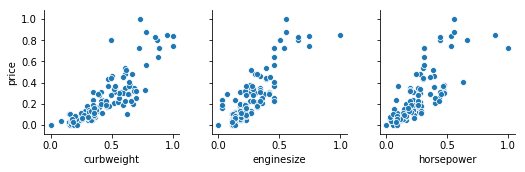

In [42]:
sns.pairplot(x_vars=['curbweight','enginesize','horsepower'],y_vars='price',data=df_train)

### Building the Linear Model
Using the RFE(Refursive Feature Elimination)

In [43]:
y_train=df_train.pop('price')
x_train=df_train

In [44]:
#Importing the required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# Using RFE with the limit of output variable = 12
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,11)
rfe=rfe.fit(x_train,y_train)

In [46]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 48),
 ('wheelbase', False, 16),
 ('carlength', False, 20),
 ('carwidth', True, 1),
 ('carheight', False, 17),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 24),
 ('horsepower', False, 14),
 ('peakrpm', False, 15),
 ('citympg', False, 38),
 ('highwaympg', False, 25),
 ('fueltype_gas', False, 23),
 ('aspiration_turbo', False, 13),
 ('doornumber_two', False, 46),
 ('carbody_hardtop', False, 30),
 ('carbody_hatchback', False, 29),
 ('carbody_sedan', False, 31),
 ('carbody_wagon', False, 32),
 ('drivewheel_fwd', False, 50),
 ('drivewheel_rwd', False, 40),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 11),
 ('enginetype_l', False, 6),
 ('enginetype_ohc', False, 54),
 ('enginetype_ohcf', False, 9),
 ('enginetype_ohcv', False, 39),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', False, 4),
 ('cylindernumber_four', False, 3),
 ('cylindernumber_six', False, 27),
 ('c

In [47]:
columns=x_train.columns[rfe.support_]
columns

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_twelve', 'CompanyName_bmw', 'CompanyName_porsche'],
      dtype='object')

In [48]:
x_train_model1= x_train[columns]

### Building the First Model

In [49]:
import statsmodels.api as sm
x_train_model1=sm.add_constant(x_train_model1)
lm=sm.OLS(y_train,x_train_model1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     130.2
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           6.86e-65
Time:                        16:31:16   Log-Likelihood:                 194.22
No. Observations:                 143   AIC:                            -364.4
Df Residuals:                     131   BIC:                            -328.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

In [50]:
# Calculating the VIFs for the variables selected
x_train_const=x_train_model1.drop(['const'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=x_train_const
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

Features    VIF
1              curbweight  44.13
0                carwidth  34.06
2              enginesize  26.36
3               boreratio   9.87
4                  stroke   7.70
10    CompanyName_porsche   1.83
8   cylindernumber_twelve   1.65
5     enginelocation_rear   1.63
6        enginetype_rotor   1.29
9         CompanyName_bmw   1.20
7    cylindernumber_three   1.04

#### Looking at the VIF score we are dropping cylindernumber_twelve from our model as it as high VIF

### Moving to the Second Model

In [51]:
x_train_model2=x_train_model1.drop(['cylindernumber_twelve'],axis=1)
x_train_model2=sm.add_constant(x_train_model2)
lm=sm.OLS(y_train,x_train_model2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     141.3
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.97e-65
Time:                        16:31:16   Log-Likelihood:                 192.84
No. Observations:                 143   AIC:                            -363.7
Df Residuals:                     132   BIC:                            -331.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1163 

In [52]:
# Calculating the VIFs for the variables selected
x_train_const=x_train_model2.drop(['const'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=x_train_const
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

Features    VIF
1            curbweight  39.81
0              carwidth  33.85
2            enginesize  17.80
3             boreratio   9.84
4                stroke   7.01
9   CompanyName_porsche   1.79
5   enginelocation_rear   1.62
6      enginetype_rotor   1.21
8       CompanyName_bmw   1.14
7  cylindernumber_three   1.03

###  Building Model 3 

In [53]:
# Again looking at the VIF score we are dropping curbweight from our model as it has high VIF value.
x_train_model3=x_train_model2.drop(['curbweight'],axis=1)
x_train_model3=sm.add_constant(x_train_model3)
lm=sm.OLS(y_train,x_train_model3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     138.5
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           4.46e-63
Time:                        16:31:16   Log-Likelihood:                 184.22
No. Observations:                 143   AIC:                            -348.4
Df Residuals:                     133   BIC:                            -318.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1362 

In [54]:
# Calculating the VIFs for the variables selected
x_train_const=x_train_model3.drop(['const'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=x_train_const
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

Features    VIF
0              carwidth  22.13
1            enginesize  10.07
2             boreratio   9.41
3                stroke   6.76
8   CompanyName_porsche   1.67
4   enginelocation_rear   1.62
5      enginetype_rotor   1.17
7       CompanyName_bmw   1.14
6  cylindernumber_three   1.03

### Building Model 4

In [55]:
# Again looking at the P value and VIF we are dropping CompanyName_porsche from our model.
x_train_model4=x_train_model3.drop(['CompanyName_porsche'],axis=1)
x_train_model4=sm.add_constant(x_train_model4)
lm=sm.OLS(y_train,x_train_model4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.6
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.94e-63
Time:                        16:31:16   Log-Likelihood:                 182.36
No. Observations:                 143   AIC:                            -346.7
Df Residuals:                     134   BIC:                            -320.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1437 

In [56]:
# Calculating the VIFs for the variables selected
x_train_const=x_train_model4.drop(['const'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=x_train_const
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

Features    VIF
0              carwidth  21.89
1            enginesize  10.06
2             boreratio   9.26
3                stroke   6.43
5      enginetype_rotor   1.16
7       CompanyName_bmw   1.14
4   enginelocation_rear   1.12
6  cylindernumber_three   1.03

## Model 5

In [57]:
# Again looking at the P value and VIF we are dropping stroke from our model.
x_train_model5=x_train_model4.drop(['stroke'],axis=1)
x_train_model5=sm.add_constant(x_train_model5)
lm=sm.OLS(y_train,x_train_model5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     170.3
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           9.11e-64
Time:                        16:31:16   Log-Likelihood:                 180.38
No. Observations:                 143   AIC:                            -344.8
Df Residuals:                     135   BIC:                            -321.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1872 

In [58]:
# Calculating the VIFs for the variables selected
x_train_const=x_train_model5.drop(['const'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=x_train_const
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif 

Features    VIF
0              carwidth  16.48
1            enginesize  10.03
2             boreratio   9.23
4      enginetype_rotor   1.16
6       CompanyName_bmw   1.14
3   enginelocation_rear   1.11
5  cylindernumber_three   1.01

## Model 6

In [59]:
# Again looking at the P value and VIF we are dropping boreratio from our model.
x_train_model6=x_train_model5.drop(['boreratio'],axis=1)
x_train_model6=sm.add_constant(x_train_model6)
lm=sm.OLS(y_train,x_train_model6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.62e-64
Time:                        16:31:17   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1976 

In [60]:
# Calculating the VIFs for the variables selected
x_train_const=x_train_model6.drop(['const'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=x_train_const
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

Features   VIF
1            enginesize  9.98
0              carwidth  9.63
3      enginetype_rotor  1.16
5       CompanyName_bmw  1.13
2   enginelocation_rear  1.08
4  cylindernumber_three  1.00

#### Here we can see that, even though the VIF values are greater than 5 but they are below 10 and the corresponding p-values and adjusted r-square looks pretty good. Thus this is my final model. 

### Residual Analysis for the Train data set

In [61]:
# We can are gonna do the residual analysis and predicting values for y on train Data
y_train_price = lm.predict(x_train_model6)

In [62]:
x_train_model6.columns

Index(['const', 'carwidth', 'enginesize', 'enginelocation_rear',
       'enginetype_rotor', 'cylindernumber_three', 'CompanyName_bmw'],
      dtype='object')

In [63]:
# Now we will visualise the residual errors by plotting distplot to analyse its spread
fig=plt.figure()
sns.distplot((y_train-y_train_price),bins=25)
fig.suptitle('Residual Error Terms',fontsize=15)
plt.xlabel('Errors')

Text(0.5,0,'Errors')

#### The residual error terms look normally distributed and thier mean is about 0 so we can proceed.

## Final Prediction model

In [64]:
# applying scaler to all the numerical attributes
num_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','symboling',
         'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [65]:
# Breaking the Dataset into X and Y set
y_test=df_test.pop('price')
x_test = df_test

In [66]:
# Using final model for prediction

#create new x test dataframe with the columns of final train dataset
x_test_new=x_test[x_train_const.columns]

# adding constant for making prediction
x_test_new=sm.add_constant(x_test_new)

In [67]:
#### Model Prediction
y_prediction = lm.predict(x_test_new)

In [68]:
### Model Evaluation

In [69]:
y_lm = sm.OLS(y_test,x_test_new).fit()
print(y_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     135.0
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           2.28e-28
Time:                        16:31:22   Log-Likelihood:                 75.634
No. Observations:                  62   AIC:                            -141.3
Df Residuals:                      57   BIC:                            -130.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2152 

Text(0,0.5,'y_pred')

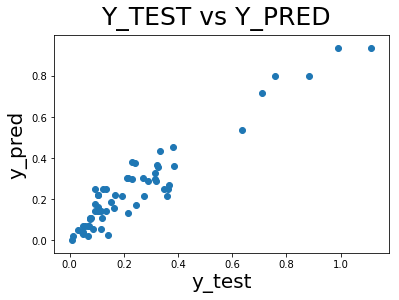

In [70]:
fig=plt.figure()
plt.scatter(y_test,y_prediction)
plt.suptitle("Y_TEST vs Y_PRED", fontsize=25)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_pred', fontsize=20)

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test, y_prediction)


0.9013443522816882

In [72]:
x_train_const.columns

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'enginetype_rotor',
       'cylindernumber_three', 'CompanyName_bmw'],
      dtype='object')

With this model, I found the following are the driver variables with goodness of fit score (r2 score =0.9013443522816882)
- carwidth
- enginesize
- enginelocation_rear
- enginetype_rotor
- cylindernumber_three
- CompanyName_bmw